<a href="https://colab.research.google.com/github/graviada/colabRepo/blob/master/TorchML/PyTorch_Lab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Во второй части вам необходимо воспроизвести в PyTorch сверточную сеть LeNet и также обучить ее на наборе MNIST.

# Класс сети LeNet.
# Нужно реализовать сеть с архитектурой, описанной на изображении lenet.png.
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), padding=(2, 2), stride=(1, 1))
        self.act1 = nn.Tanh()
        self.pool1 = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), padding=(0, 0), stride=(1, 1))
        self.act2 = nn.Tanh()
        self.pool2 = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5), padding=(0, 0), stride=(1, 1))
        self.act3 = nn.Tanh()

        self.fc1 = nn.Linear(in_features=120, out_features=84)
        self.act4 = nn.Tanh()

        self.fc2 = nn.Linear(in_features=84, out_features=10)
        self.act_final = nn.LogSoftmax(dim=1)
        # ===============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        x = self.pool1(self.act1(self.conv1(x)))
        x = self.pool2(self.act2(self.conv2(x)))
        x = self.act3(self.conv3(x))
        x = x.view(-1 , x.size(1))
        x = self.act4(self.fc1(x))
        x = self.act_final(self.fc2(x))
        return x
        # ===============

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 256

# Загружаем данные из набора MNIST
train_data = datasets.MNIST(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Готовимся к обучению
model = LeNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.NLLLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

In [ ]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        # batch = batch.reshape(batch.shape[0], -1).to(device)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels.to(device))
        loss.backward()
        optimizer.step()
        # ===============
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.3587157726287842
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.32709580659866333
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.26954421401023865
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.1657884269952774
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.12179639935493469
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.18833576142787933
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.0771927759051323
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.06162428483366966
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.06455116719007492
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.1635991930961609


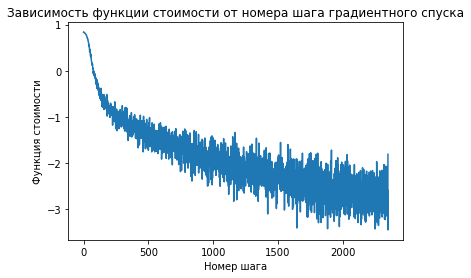

In [ ]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))

Точность (accuracy) на обучающей выборке: 0.9812333333333333
Точность (accuracy) на тестовой выборке: 0.9776
